<a href="https://colab.research.google.com/github/DeVcB13d/OpenCV_Tut/blob/main/Histograms_and_intensities_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histograms and Intensity Values

In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/goldhill.bmp -O goldhill.bmp
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg -O cameraman.jpeg
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/zelda.png -O zelda.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/mammogram.png -O mammogram.png

--2022-06-25 01:56:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lenna.png’

lenna.png           100%[===================>] 462.73K  --.-KB/s    in 0.1s    

2022-06-25 01:56:15 (4.06 MB/s) - ‘lenna.png’ saved [473831/473831]

--2022-06-25 01:56:15--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-cours

In [2]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np


In [37]:
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(5,5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

In [30]:
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

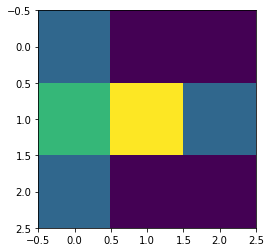

In [5]:
toy_image = np.array([[1,0,0],[2,3,1],[1,0,0]],dtype = "uint8")
plt.imshow(toy_image)
plt.show()

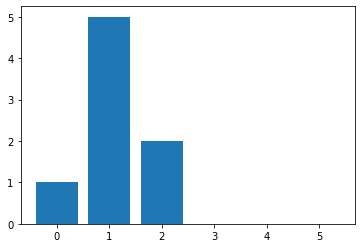

In [6]:
#Plotting a histogram
plt.bar([x for x in range(6)],[1,5,2,0,0,0])
plt.show()

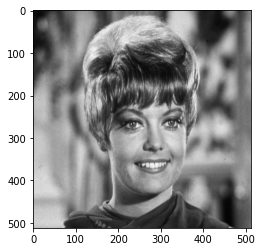

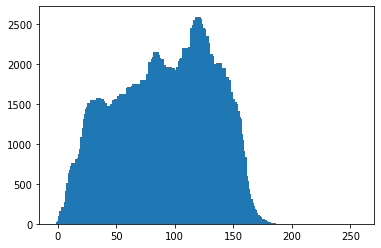

In [7]:
img = cv.imread("zelda.png",cv.IMREAD_GRAYSCALE)
plt.imshow(img,cmap="gray")
plt.show()
#intensity,values = cv.calcHist([img],[0],None,[255],[0,255])
hist = cv.calcHist([img],[0], None, [256], [0,256])
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)
plt.show()

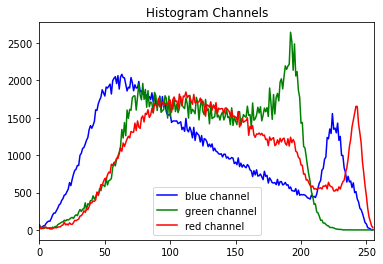

In [8]:
img2 = cv.imread("baboon.png")
color = ('blue','green','red')
for i,col in enumerate(color):
    histr = cv.calcHist([img2],[i],None,[256],[0,256])
    plt.plot(intensity_values,histr,color = col,label=col+" channel")
    
    plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()

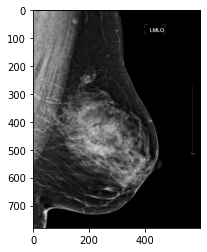

In [31]:
img1 = cv.imread("mammogram.png",cv.IMREAD_GRAYSCALE)
plt.imshow(img1,cmap="gray")

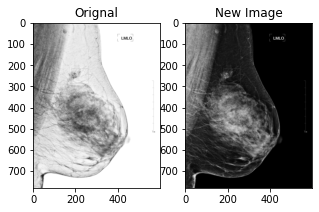

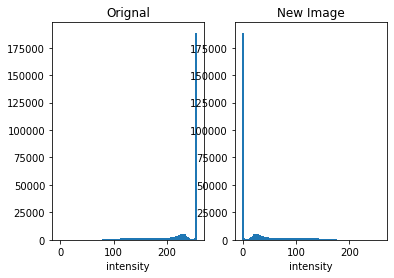

In [38]:
img = cv.imread("mammogram.png",cv.IMREAD_GRAYSCALE)
for i in range(img.shape[0]):
  for j in range(img.shape[1]):     
    T = -1*img[i,j] + 255
    if T>255:
      T = 255
    elif T<0:
      T = 0
    img[i,j] = T
#plt.imshow(img,cmap="gray")
plot_image(img,img1)
plot_hist(img,img1)

Text(0.5, 1.0, 'Bar Histogram')

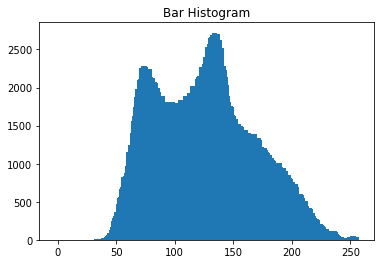

In [20]:
hist = cv.calcHist([img],[0],None,[256],[0,256])
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values,hist[:,0],width=5)
plt.title("Bar Histogram")


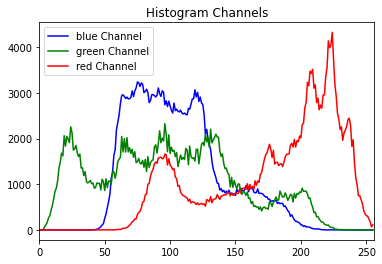

In [39]:
#Reading all the color channels
img = cv.imread("lenna.png")
color = ('blue','green','red')
for i,col in enumerate(color):
  hist = cv.calcHist([img],[i],None,[256],[0,256])
  plt.plot(intensity_values,hist,color = col,label = col+" Channel")
  plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()

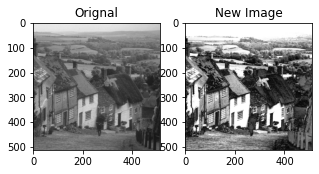

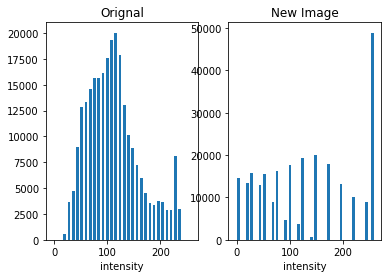

In [49]:
alpha = 3 # Simple contrast control
beta = -200   # Simple brightness control   
goldhill = cv.imread("goldhill.bmp")
new_image = cv.convertScaleAbs(goldhill, alpha=alpha, beta=beta)
plot_image(goldhill,new_image)
plot_hist(goldhill,new_image)

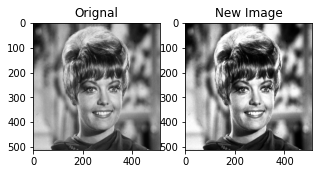

In [50]:
zelda = cv.imread("zelda.png",cv.IMREAD_GRAYSCALE)
new_zelda = cv.equalizeHist(zelda)
plot_image(zelda,new_zelda)

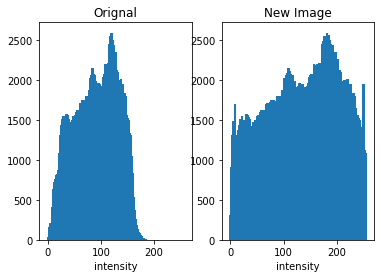

In [53]:
plot_hist(zelda,new_zelda)

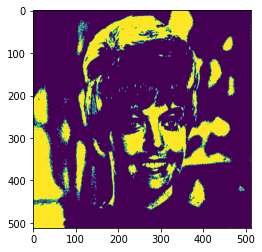

In [63]:
def thresholding(img,threshold,max = 255,min = 0):
    N,M=img.shape
    image_out=np.zeros((N,M),dtype=np.uint8)
        
    for i  in range(N):
        for j in range(M):
            if img[i,j]> threshold:
                image_out[i,j]=max
            else:
                image_out[i,j]=min
                
    return image_out                    

t_zelda = thresholding(zelda,255//2)
plt.imshow(t_zelda)



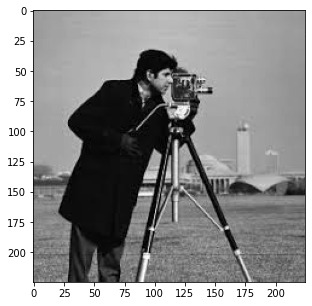

In [65]:
image = cv.imread("cameraman.jpeg", cv.IMREAD_GRAYSCALE)
plt.figure(figsize=(5,5))
plt.imshow(image, cmap="gray")
plt.show()

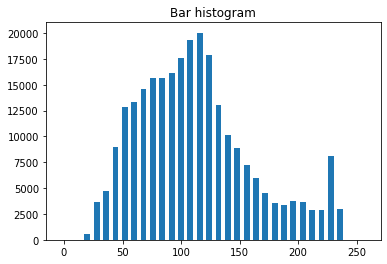

In [66]:
hist = cv.calcHist([goldhill], [0], None, [256], [0, 256])
plt.bar(intensity_values, hist[:, 0], width=5)
plt.title("Bar histogram")
plt.show()

In [61]:
threshold = 87
max_value = 255
min_value = 0
new_image = thresholding(image, threshold=threshold, max=max_value, min=min_value)

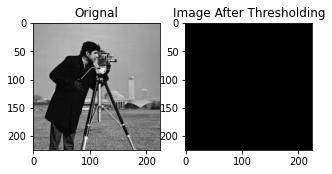

In [67]:
plot_image(image, new_image, "Orignal", "Image After Thresholding")

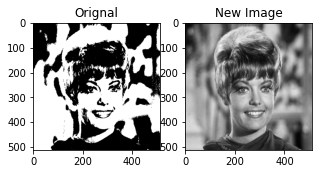

88.0


In [75]:
ret,thr_img = cv.threshold(zelda,100,255,cv.THRESH_OTSU)
plot_image(thr_img,zelda)
print(ret)